In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
# load data dan display 
df = pd.read_excel('data.xlsx')
df.head()

,Tanggal,Suhu minimum,Suhu maksimum,Suhu rata2,Kelembaban rata2,Curah hujan,Durasi penyinaran matahari,Kecepatan angin maksimum,Arah kecepatan,Kecepatan angin rata2,Arah angin
0,01-01-2019,23.1,31.0,26.1,88,1.4,4.8,2,230,1,C
1,02-01-2019,23.0,30.4,25.1,93,12.0,2.5,2,260,1,C
2,03-01-2019,23.0,31.4,24.4,92,15.2,2.2,2,200,1,C
3,04-01-2019,23.0,31.8,26.3,88,13.4,0.2,2,180,1,S
4,05-01-2019,23.2,30.4,26.4,88,7.7,8.1,2,200,1,C


In [11]:
#cek tipe data
df.dtypes

Tanggal                        object
Suhu minimum                  float64
Suhu maksimum                 float64
Suhu rata2                    float64
Kelembaban rata2                int64
Curah hujan                   float64
Durasi penyinaran matahari    float64
Kecepatan angin maksimum        int64
Arah kecepatan                  int64
Kecepatan angin rata2           int64
Arah angin                     object
dtype: object

In [12]:
#ubah kolom tanggal menjadi datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d-%m-%Y')

In [13]:
df.dtypes

Tanggal                       datetime64[ns]
Suhu minimum                         float64
Suhu maksimum                        float64
Suhu rata2                           float64
Kelembaban rata2                       int64
Curah hujan                          float64
Durasi penyinaran matahari           float64
Kecepatan angin maksimum               int64
Arah kecepatan                         int64
Kecepatan angin rata2                  int64
Arah angin                            object
dtype: object

In [16]:
#tambahkan kolom bulan
df['bulan'] = df['Tanggal'].dt.month

In [17]:
df.tail()

,Tanggal,Suhu minimum,Suhu maksimum,Suhu rata2,Kelembaban rata2,Curah hujan,Durasi penyinaran matahari,Kecepatan angin maksimum,Arah kecepatan,Kecepatan angin rata2,Arah angin,bulan
238,2019-08-27,22.0,31.0,25.6,78,0.0,0.5,2,240,1,C,8
239,2019-08-28,19.0,31.4,24.4,83,NaN,5.0,2,180,1,C,8
240,2019-08-29,20.0,30.7,24.4,82,NaN,9.0,2,90,1,C,8
241,2019-08-30,20.0,32.2,24.7,77,0.0,7.8,3,180,1,C,8
242,2019-08-31,19.0,31.0,24.0,78,0.0,8.3,2,240,1,S,8


In [18]:
#cek data kosong 
df.isnull().sum()

Tanggal                        0
Suhu minimum                   3
Suhu maksimum                  1
Suhu rata2                     0
Kelembaban rata2               0
Curah hujan                   38
Durasi penyinaran matahari     2
Kecepatan angin maksimum       0
Arah kecepatan                 0
Kecepatan angin rata2          0
Arah angin                     0
bulan                          0
dtype: int64

In [20]:
#isi data kosong dengan rata-rata
list_kolom_data_kosong = ['Suhu minimum', 'Suhu maksimum', 'Curah hujan', 'Durasi penyinaran matahari']
for col in list_kolom_data_kosong:
    df[col] = df[col].fillna(df[col].mean())
df.isnull().sum()

Tanggal                       0
Suhu minimum                  0
Suhu maksimum                 0
Suhu rata2                    0
Kelembaban rata2              0
Curah hujan                   0
Durasi penyinaran matahari    0
Kecepatan angin maksimum      0
Arah kecepatan                0
Kecepatan angin rata2         0
Arah angin                    0
bulan                         0
dtype: int64

In [21]:
# drop beberapa data non numerik
df_new = df.drop(['Tanggal', 'Arah angin'], axis=1)
df_new.head()

,Suhu minimum,Suhu maksimum,Suhu rata2,Kelembaban rata2,Curah hujan,Durasi penyinaran matahari,Kecepatan angin maksimum,Arah kecepatan,Kecepatan angin rata2,bulan
0,23.1,31.0,26.1,88,1.4,4.8,2,230,1,1
1,23.0,30.4,25.1,93,12.0,2.5,2,260,1,1
2,23.0,31.4,24.4,92,15.2,2.2,2,200,1,1
3,23.0,31.8,26.3,88,13.4,0.2,2,180,1,1
4,23.2,30.4,26.4,88,7.7,8.1,2,200,1,1


In [24]:
#group by berdasarkan bulan
grouped_df_new = df_new.groupby('bulan').mean()
grouped_df_new = grouped_df_new.reset_index()
grouped_df_new

,bulan,Suhu minimum,Suhu maksimum,Suhu rata2,Kelembaban rata2,Curah hujan,Durasi penyinaran matahari,Kecepatan angin maksimum,Arah kecepatan,Kecepatan angin rata2
0,1,23.379194,31.764516,26.400000,87.709677,340.145067,6.183242,2.290323,202.903226,0.709677
1,2,23.567857,31.782143,26.614286,87.035714,396.381986,6.050000,2.107143,193.571429,0.678571
2,3,23.361290,31.093548,26.235484,87.967742,1782.574099,4.267742,2.000000,177.096774,0.548387
3,4,23.930000,32.433333,27.240000,85.033333,1023.449707,339.450000,2.033333,184.333333,0.600000
4,5,22.851613,32.729032,26.680645,82.161290,1316.335106,7.474194,2.064516,209.354839,0.838710
5,6,20.766667,30.808058,24.676667,82.600000,109.483089,7.546017,2.133333,221.000000,0.833333
6,7,20.267016,30.348387,24.316129,81.225806,148.286766,6.890323,2.129032,193.225806,0.967742
7,8,20.225806,30.619355,24.467742,79.612903,105.919119,7.670968,2.322581,179.677419,1.064516


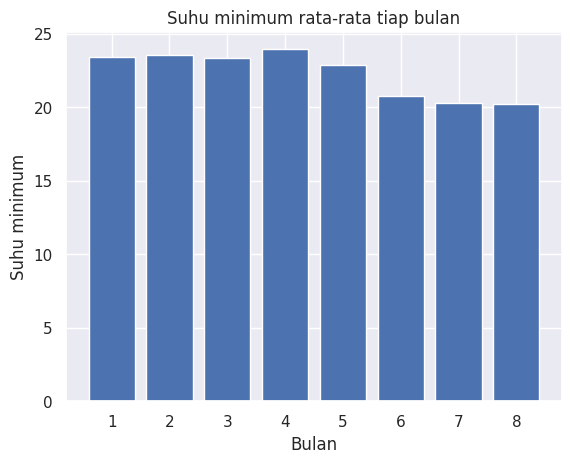

In [26]:
#plot suhu minimum rata-rata tiap bulan
bulan = grouped_df_new['bulan'].to_numpy()
suhu_min = grouped_df_new['Suhu minimum'].to_numpy()
plt.bar(bulan, suhu_min)
plt.xlabel('Bulan')
plt.ylabel('Suhu minimum')
plt.title('Suhu minimum rata-rata tiap bulan')
plt.show()

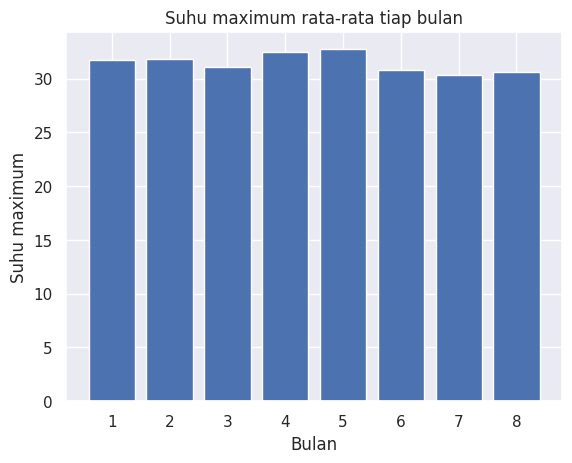

In [28]:
#plot suhu maximum rata-rata tiap bulan
bulan = grouped_df_new['bulan'].to_numpy()
suhu_min = grouped_df_new['Suhu maksimum'].to_numpy()
plt.bar(bulan, suhu_min)
plt.xlabel('Bulan')
plt.ylabel('Suhu maximum')
plt.title('Suhu maximum rata-rata tiap bulan')
plt.show()